In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import os,re
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
%matplotlib inline

In [2]:
df1 = pd.read_csv("master.tsv",sep="\t",index_col=0)
y1 = df1['NormalizedMean']
x1 = df1.drop(columns=['NormalizedMean','fwd_hairpin_dG','amplicon_seq',
 'fwd_hairpin_tm','fwd_homod_dG',
 'fwd_homod_tm','rev_hairpin_dG',
 'rev_hairpin_tm','fwd_chr_cor',
 'rev_homod_dG','fwd_primerseq',
 'rev_homod_tm','pp_heterd_Tm',
'rev_chr_cor','rev_primerseq',
 'pp_heterd_dG','rev_pscore','fwd_pscore',
 'amplicon_name', 'fwd_distance3p',
 'rev_distance3p',
 'amplicon_chr_cor','fwd_maxNrun',
 'amplicon_chr','rev_maxNrun',
 'amplicon_start',
 'amplicon_end',
 'insert_start',
 'insert_end','fwd_exact_snp','fwd_range_snp','rev_exact_snp','rev_range_snp',
 'insert_hit_less2mismatch','Tm_difference','amp_Tm'])

df2 = pd.read_csv("amlValuesWithProperties.tsv",sep="\t",index_col=0)
y2 = df2['normalizedMean']
x2 = df2.drop(columns=['normalizedMean','fwd_homoTm',
 'fwd_homo_dG',
 'fwd_hairpinTm',
 'fwd_hairpindG',
 'rev_homoTm',
 'rev_homo_dG',
 'rev_hairpinTm',
 'rev_hairpindG'])

df3 = pd.read_csv("amlEngValuesWithProperties.tsv",sep="\t",index_col=0)
y3 = df3['normalizedMean']
x3 = df3.drop(columns=['normalizedMean','fwd_homoTm',
 'fwd_homo_dG',
 'fwd_hairpinTm',
 'fwd_hairpindG',
 'rev_homoTm',
 'rev_homo_dG',
 'rev_hairpinTm',
 'rev_hairpindG'])


yC1 = y1.copy()
yC1 = yC1.astype(dtype='str')
for i in range(len(y1)):
    if y1[i] < 0.2:
        yC1[i] = "low"
    elif y1[i] >=0.2 and y1[i] < 2:
        yC1[i] = "ok"
    else:
        yC1[i] = "high"
        
yC2 = y2.copy()
yC2 = yC2.astype(dtype='str')
for i in range(len(y2)):
    if y2[i] < 0.2:
        yC2[i] = "low"
    elif y2[i] >=0.2 and y2[i] < 2:
        yC2[i] = "ok"
    else:
        yC2[i] = "high"
        
yC3 = y3.copy()
yC3 = yC3.astype(dtype='str')
for i in range(len(y3)):
    if y3[i] < 0.2:
        yC3[i] = "low"
    elif y3[i] >=0.2 and y3[i] <= 2:
        yC3[i] = "ok"
    else:
        yC3[i] = "high"        
        
x1['Panel'] = np.repeat('Blue',x1.shape[0])
x2['Panel'] = np.repeat('Red',x2.shape[0])
x3['Panel'] = np.repeat('Green',x3.shape[0])
x = pd.concat([x1,x2,x3])
y = pd.concat([y1,y2,y3])
yC = pd.concat([yC1,yC2,yC3])
df = x.copy()
df['normalizedMean'] = y
list(df)
df = df[df.Panel == 'Blue']
forCor = df.copy()
forCor = forCor.drop(columns=['Panel','normalizedMean'])

/Users/saurabhgulati/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



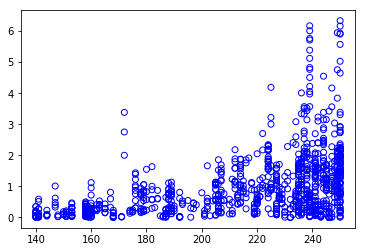

In [3]:
# ax = sns.scatterplot(y="normalizedMean", x="amplicon_length", hue='Panel', style="Panel",data=df)
plt.scatter(df['amplicon_length'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("amplicon_length.png")

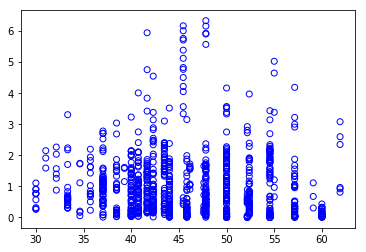

In [4]:
# ax = sns.scatterplot(y="normalizedMean", x="fwd_GC", hue='Panel', style="Panel", data=df)
plt.scatter(df['fwd_GC'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("fwd_GC.png")

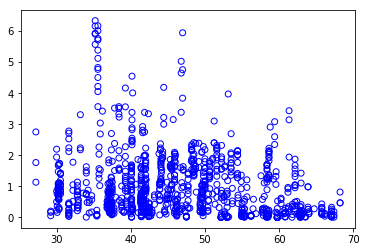

In [5]:
# ax = sns.scatterplot(y="normalizedMean", x="ampliconGC", hue='Panel', style="Panel", data=df)
plt.scatter(df['ampliconGC'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("ampliconGC.png")

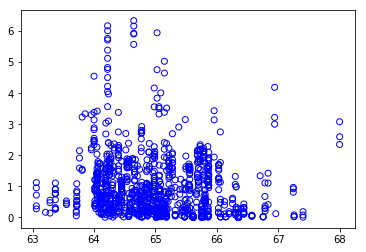

In [6]:
# ax = sns.scatterplot(y="normalizedMean", x="fwd_Tm", hue='Panel', style="Panel", data=df)
plt.scatter(df['fwd_Tm'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("fwd_Tm.png")

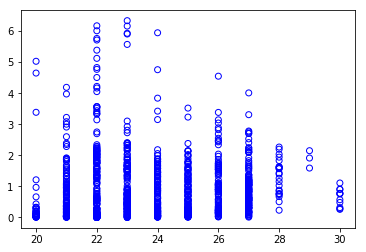

In [7]:
# ax = sns.scatterplot(y="normalizedMean", x="fwd_len", hue='Panel', style="Panel", data=df)
plt.scatter(df['fwd_len'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("fwd_len.png")

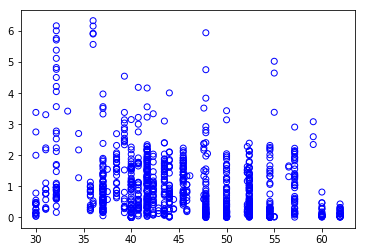

In [8]:
# ax = sns.scatterplot(y="normalizedMean", x="rev_GC", hue='Panel', style="Panel", data=df)
plt.scatter(df['rev_GC'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("rev_GC.png")

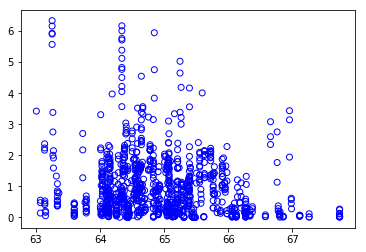

In [9]:
# ax = sns.scatterplot(y="normalizedMean", x="rev_Tm", hue='Panel', style="Panel", data=df)
plt.scatter(df['rev_Tm'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("rev_Tm.png")

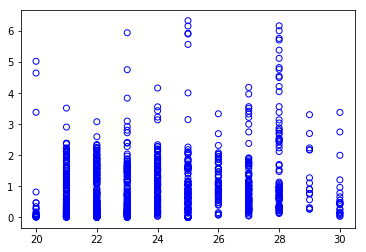

In [10]:
# ax = sns.scatterplot(y="normalizedMean", x="rev_len", hue='Panel', style="Panel", data=df)
plt.scatter(df['rev_len'],df['normalizedMean'],facecolors='none',edgecolors=df['Panel'])
# plt.title('Red = AML_MBM , Green = AML_ENG')
plt.savefig("rev_len.png")

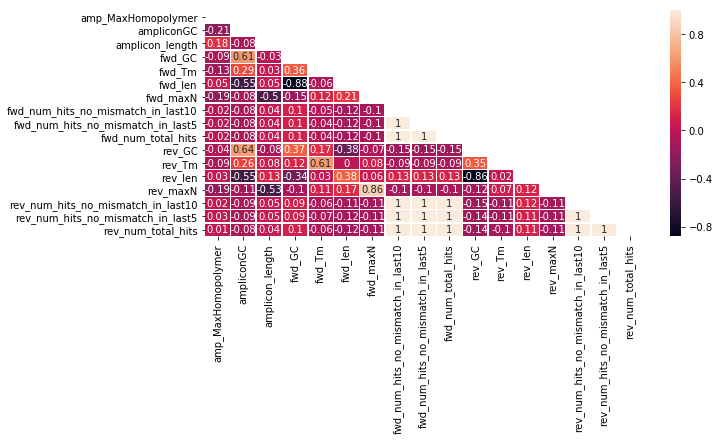

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
corr = x.drop(columns=['Panel']).corr()
corr = corr.apply(lambda x: x.round(2))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True,linewidths=.5)
plt.gcf().subplots_adjust(bottom=0.5)
plt.gcf().subplots_adjust(left=0.25)
plt.savefig("correlationHeatmapBeforeFeatureSelection.png")